<a href="https://colab.research.google.com/github/JoshuoYang/Machine_Learning-project1/blob/main/2022_Fall_ML_HW_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1_310712009

# HW1-1

## 說明

若要求方程式Ax=b，最值得方式就是將方程式移項，得到x=A^{-1}b，算出A的逆矩陣，但這樣做法的計算量太大。

(1)故使用LUDecomposition(LU分解)，將A拆解成上下兩個三角形矩陣 L 和 U

(2)如此，我們得到一個等式 A = LU。同時我們可以用 LU 置換 A，得到 LUx = b。

(3)下一步再令 y = UX ，我們將可得到一組新的方程組其等價於原方程式(Ax=b)。

Ly = b
UX = y

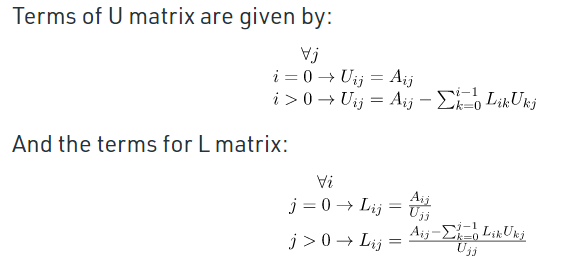

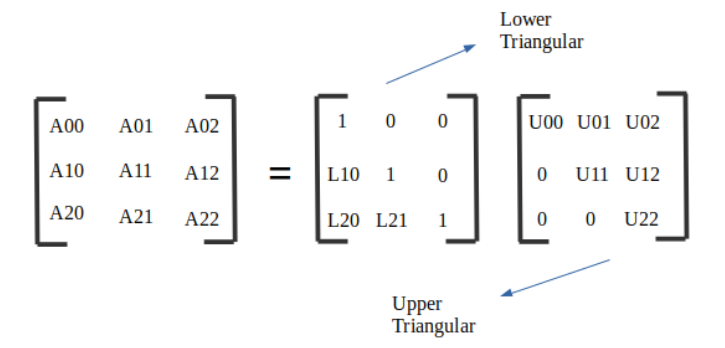

## LUDecomposition_Approach1

In [ ]:
import numpy as np

def LU_D(matr):

    #Get the number of rows
    n = matr.shape[0]

    #Create the matrix with n*n for LU Decomposition
    L = np.eye(n, dtype=np.double)
    U = np.zeros((n, n))

    # Decomposing matrix into Upper and Lower triangular matrix
    for i in range(n):

        # Upper Triangular
        for j in range(i, n):
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = matr[i][j] - sum

        # Lower Triangular
        for j in range(i, n):
            if (i != j):

                # Summation of L(j, k) * U(k, i)
                sum = 0
                for k in range(i):
                    sum += (L[j][k] * U[k][i])

                # Evaluating L(j, i)
                L[j][i] = (matr[j][i] - sum) / U[i][i]

    return L, U

In [ ]:
matrix =np.array([[2,-2,1],[0,1,2],[5,3,1]])
L, U = LU_D(matrix)
print(L)
print(U)

[[1.  0.  0. ]
 [0.  1.  0. ]
 [2.5 8.  1. ]]
[[  2.   -2.    1. ]
 [  0.    1.    2. ]
 [  0.    0.  -17.5]]


## LUDecomposition_Approach2

In [ ]:
import numpy as np

def LU_D1(matr):

    #Get the number of rows
    n = matr.shape[0]

    #Create the matrix with n*n for LU Decomposition
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    #Decomposing matrix into Upper and Lower triangular matrix
    for i in range(n):

        # Lower Triangular
        for j in range(i):
            sum = 0
            for k in range(j):
                sum += L[i][k] * U[k][j]
            L[i][j] = (matr[i][j] - sum) / U[j][j]
        L[i][i] = 1

        # Upper Triangular
        for j in range(i, n):
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = matr[i][j] - sum

    return L, U

In [ ]:
# matrix =numpy.array([[2,-1,-2],[-4,6,3],[-4,-2,8]])
matrix =np.array([[2,-2,1],[0,1,2],[5,3,1]])
L, U = LU_D1(matrix)
print(L)
print(U)

[[1.  0.  0. ]
 [0.  1.  0. ]
 [2.5 8.  1. ]]
[[  2.   -2.    1. ]
 [  0.    1.    2. ]
 [  0.    0.  -17.5]]


# HW1-2

https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html

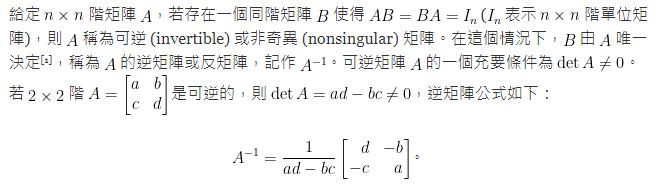

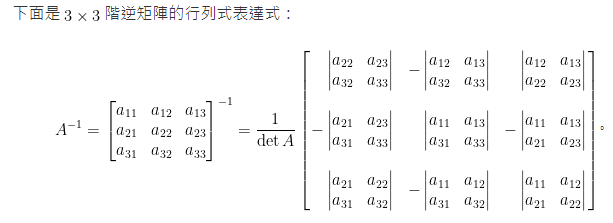

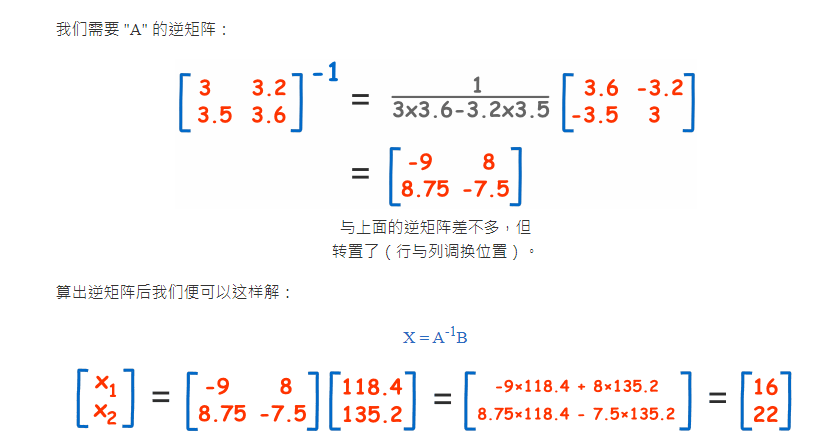

https://www.gaussianwaves.com/2013/05/solving-a-triangular-matrix-using-forward-backward-substitution/

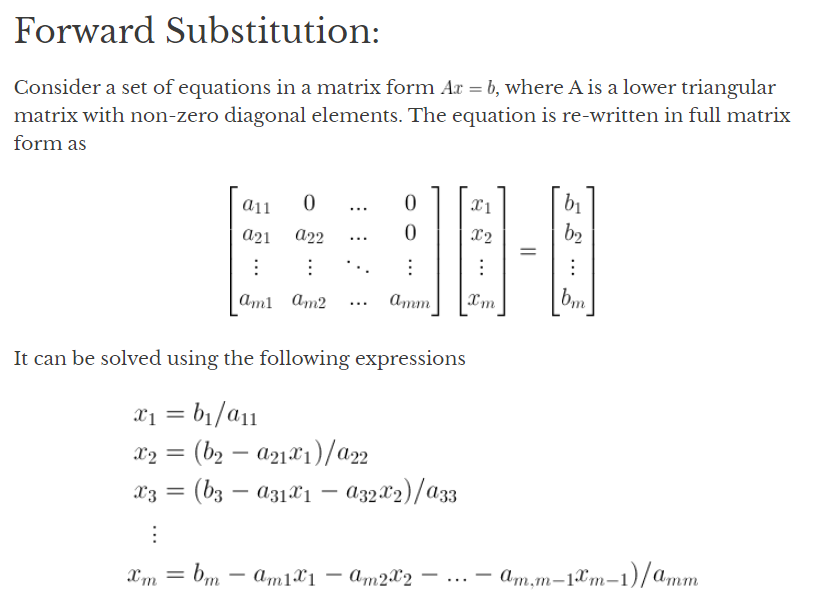
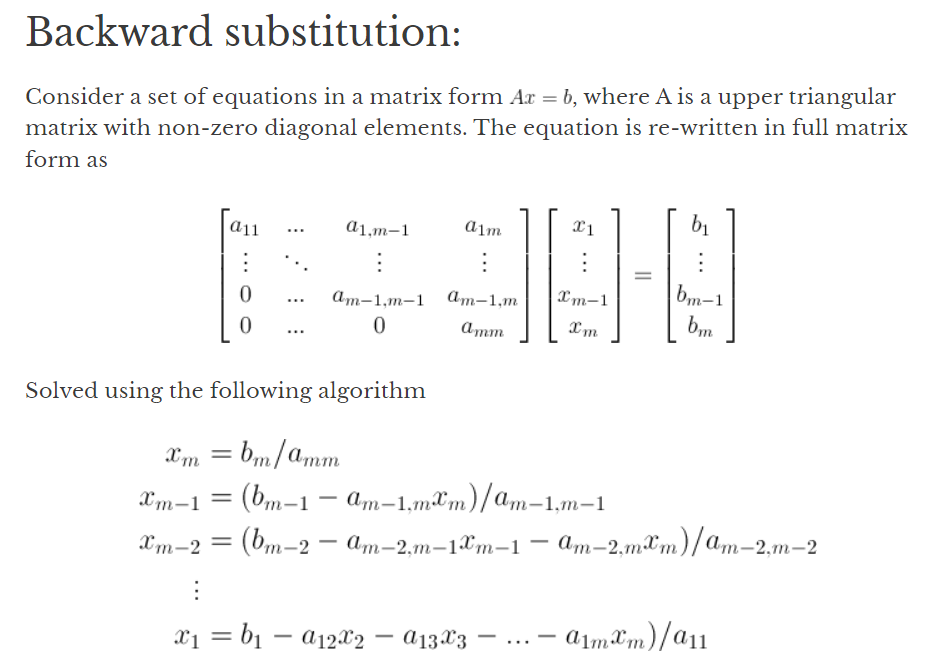

## Inverse

In [ ]:
def L_inv(L, B):

    #Get number of rows
    n = L.shape[0]

    #Allocating space for the solution vector
    y = np.zeros_like(B, dtype=np.double);

    #Here we perform the forward-substitution.
    #Initializing  with the first row.
    y[0] = B[0] / L[0, 0]

    #Looping over rows in reverse (from the bottom  up),
    #starting with the second to last row, because  the
    #last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (B[i] - np.dot(L[i,:i], y[:i])) / L[i,i]

    return y

In [ ]:
import numpy as np

def inverse(A):

    #Get the number of rows
    n = A.shape[0]
    L, U = LU_D(A)
    B = np.eye(n)
    A_inv = np.zeros((n, n))

    B = L_inv(L, B)

    for i in range(n-1, -1, -1):
        for j in range(n):
            sum = 0
            for k in range(i+1, n):
                sum += U[i][k] * A_inv[k][j]
            A_inv[i][j] = (B[i][j] - sum) / U[i][i]

    return A_inv

In [ ]:
matrix =np.array([[2,-2,1],[0,1,2],[5,3,1]])

A_inv = inverse(matrix)
A_inv

array([[ 0.14285714, -0.14285714,  0.14285714],
       [-0.28571429,  0.08571429,  0.11428571],
       [ 0.14285714,  0.45714286, -0.05714286]])

# HW1-3
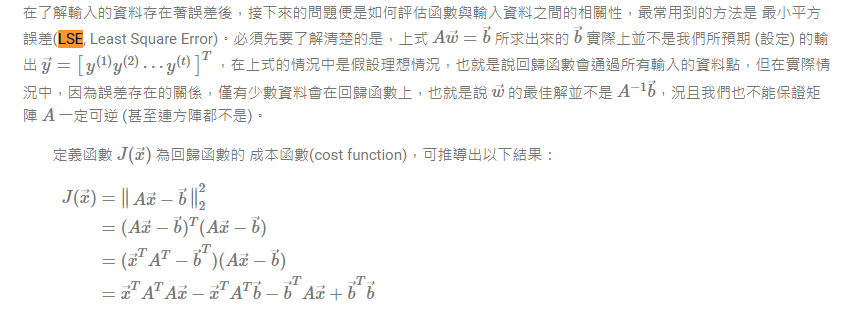
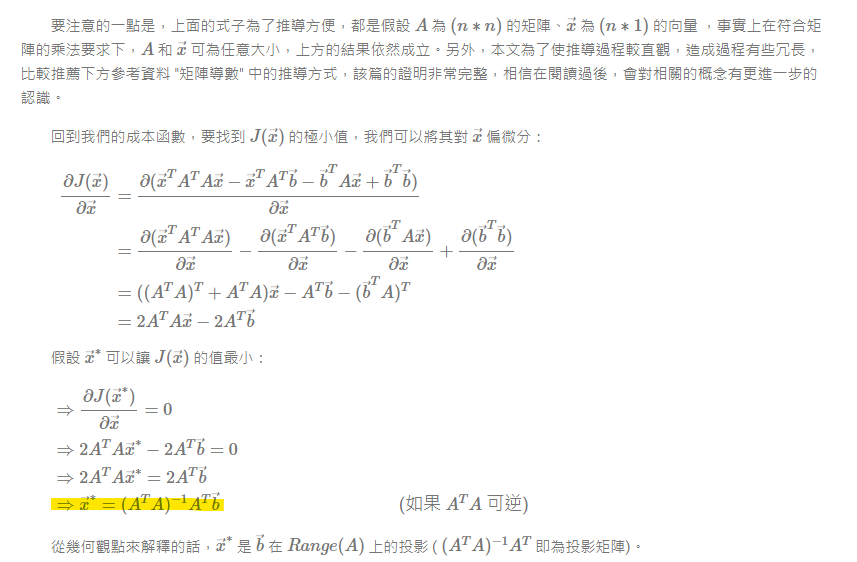

## LSE

In [ ]:
import numpy as np

#Assume polynomial equation Ax = b
def LSE(base_N, Lambda, X, Y):
  A = np.zeros((len(X), base_N))
  b = np.array([Y]).T
  #微分
  for i in range(len(X)):
      for j in range(base_N):
          A[i][j] = X[i]**(base_N-1-j)
  # LSE = inverse(A.T.dot(A) + Lambda * np.eye(base_N)).dot(A.T).dot(b).T
  return inverse(A.T.dot(A) + Lambda * np.eye(base_N)).dot(A.T).dot(b).T, A, b

# HW1-4
Newton

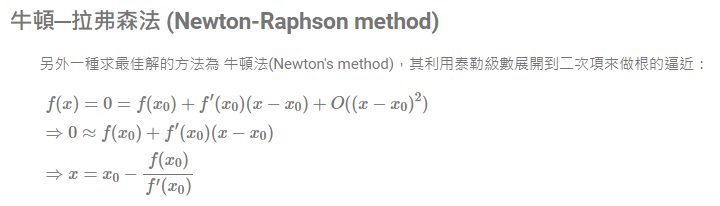

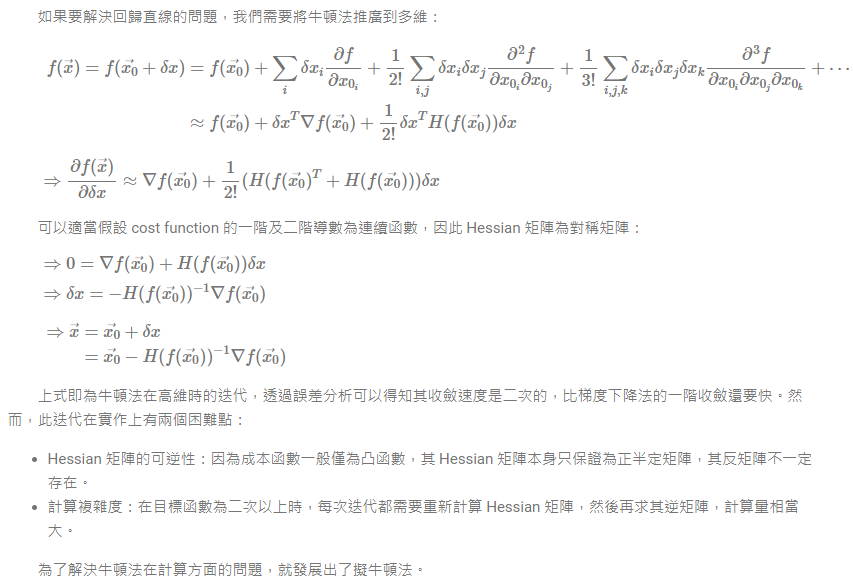

## Newton

In [ ]:
import numpy as np

#Assume polynomial equation Ax = b
def Newtons(base_N, A, b):
    Hf = 2 * A.T.dot(A)
    x0 = 10 * np.random.rand(base_N, 1) - 5    # Create a x0 in range [-5, 5)

    d_x = 1000
    count = 0
    while (d_x > 1e-7):
        x1 = x0 - inverse(Hf).dot(Hf.dot(x0) - 2 * (A.T).dot(b))
        sum = 0
        for i in range(base_N):
            sum += abs(x1[i] - x0[i])
        if (sum <= d_x):
            d_x = sum
            x0 = x1
        else:
            break
        count += 1
        if count > 10000:
            break
    return x0.T

#HW1-5

## Result & Input

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from matplotlib import pyplot
import numpy
import math

base_N = int(input("Enter the number of polynomial bases N: "))
Lambda = float(input("Enter lambda for LSE: "))

# Read test file
# testFile = "test.txt"
testFile = "/content/gdrive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW1_1001/test.txt"
file = open(testFile, 'r')
data = file.readline()

X_line = []
Y_line = []
while data:
    x, y = list(map(float, data.split(',')))
    X_line.append(x)
    Y_line.append(y)
    data = file.readline()

# LSE_P = LSE(base_N, Lambda, X_line, Y_line)[0]
# Newton_P = Newtons(base_N, X_line, Y_line)[0]

LSE_P = LSE(base_N, Lambda, X_line, Y_line)[0][0]
A = LSE(base_N, Lambda, X_line, Y_line)[1]
b = LSE(base_N, Lambda, X_line, Y_line)[2]
Newton_P = Newtons(base_N, A, b)[0]

x = np.linspace(math.floor(min(X_line)) - 1, math.floor(max(X_line)) + 1, 1000)
y_LSE = [0]*len(x)
y_Newton = [0]*len(x)
for i in range(base_N):
    y_LSE += LSE_P[i] * x ** (base_N-1-i)
    y_Newton += Newton_P[i] * x ** (base_N-1-i)

Enter the number of polynomial bases N: 3
Enter lambda for LSE: 10000


## Result of LSE (Fitting line & Plot)

In [ ]:
# Data Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Show Fitting line and Total error
print("Result of LSE:")
result_LSE = "Fitting line: "
for i in range(base_N):
    if (i != 0) & (LSE_P[i] >= 0) & (LSE_P[i-1] != 0):
        result_LSE += "+ "
    if LSE_P[i] !=0:
        result_LSE += str(LSE_P[i]) + (("X^" + str(base_N-1-i) + " ") if i != base_N-1 else "")
print(result_LSE)
error_LSE = 0
for i in range(len(X_line)):
    line_error = 0
    for j in range(base_N):
        line_error = line_error + LSE_P[j] * X_line[i]**(base_N-1-j)
    error_LSE += (line_error - Y_line[i])**2
print("Total error:", error_LSE, "\n")

# Create figure with secondary y-axis
fig1 = make_subplots(specs=[[{"secondary_y": True}]])

fig = fig1
fig.add_trace(
    go.Scatter(x = X_line, y = Y_line,
               marker_color = 'rgb(127,60,141)', name = 'test data', mode = "markers"), #, line = dict(width = 4)),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=x, y=y_LSE,
               marker_color = 'rgb(128, 177, 211)', name = 'LSE Fitting line', line = dict(width = 2)),
    secondary_y=False,)

# Set y-axes titles
fig.update_yaxes(title_text= "Y-axis")

# Set x-axis title
fig.update_xaxes(
          showgrid=True,
          tickformat="%b\n%Y",
          title_text = "X-axis",
          titlefont = dict(size = 15))

# Update layout properties
fig.update_layout(
    title_text=("Result of LSE: n=" + str(base_N) + ", lambda=" + str(Lambda)),
    width = 1000,
    height = 500,
    legend = dict(font = dict(size = 20)),
    legend_title = dict(font = dict(size = 20)),
    xaxis = dict(tickfont = dict(size=15)),
)

fig1.show()

Result of LSE:
Fitting line: 0.8345332827002858X^2 + 0.09314819831918816X^1 + 0.046950699273469274
Total error: 22649.738493024153 



##Result of Newton's method (Fitting line & Plot)

In [ ]:
print("Result of Newton's Method:")
result_Newton = "Fitting line: "
for i in range(base_N):
    if (i != 0) & (Newton_P[i] >= 0) & (Newton_P[i-1] != 0):
        result_Newton += "+ "
    if Newton_P[i] !=0:
        result_Newton += str(Newton_P[i]) + (("X^" + str(base_N-1-i) + " ") if i != base_N-1 else "")
print(result_Newton)
error_Newton = 0
for i in range(len(X_line)):
    line_error = 0
    for j in range(base_N):
        line_error = line_error + Newton_P[j] * X_line[i]**(base_N-1-j)
    error_Newton += (line_error - Y_line[i])**2
print("Total error:", error_Newton)

# Create figure with secondary y-axis
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

fig = fig2
fig.add_trace(
    go.Scatter(x = X_line, y = Y_line,
               marker_color = 'rgb(127,60,141)', name = 'test data', mode = "markers"), #, line = dict(width = 4)),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=x, y=y_Newton,
               marker_color = 'rgb(128, 177, 211)', name = "Newton's method Fitting line", line = dict(width = 2)),
    secondary_y=False,)

# Set y-axes titles
fig.update_yaxes(title_text= "Y-axis")

# Set x-axis title
fig.update_xaxes(
          showgrid=True,
          tickformat="%b\n%Y",
          title_text = "X-axis",
          titlefont = dict(size = 15))

# Update layout properties
fig.update_layout(
    title_text=("Result of Newton's method: n=" + str(base_N)),
    width = 1000,
    height = 500,
    legend = dict(font = dict(size = 20)),
    legend_title = dict(font = dict(size = 20)),
    xaxis = dict(tickfont = dict(size=15)),
)

fig2.show()

Result of Newton's Method:
Fitting line: 3.02385339348657X^2 + 4.906190263863799X^1 -0.2314017560877044
Total error: 26.559959499333036
